In [2]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk import pos_tag
import re

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/mateus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mateus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/mateus/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/mateus/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/mateus/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
#Criando data frame
data_frame = pd.read_csv("SMSSpamCollection", sep="\t" ,header = None, names=["label","message"])
display(data_frame)

count = data_frame['label'].value_counts()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


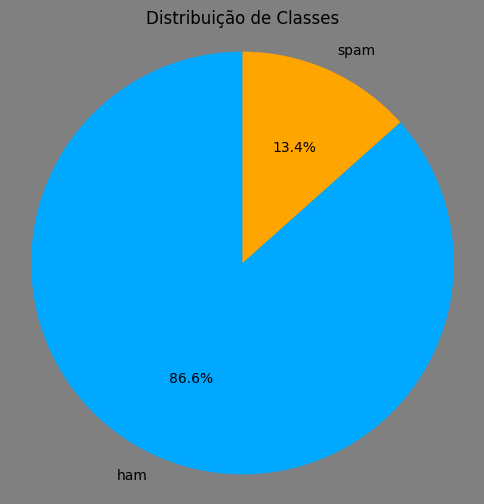

In [5]:
#plotando Distribuição de Classes
fig, ax = plt.subplots(figsize=(6,6), facecolor='grey')
colors = ['#00A8FF', '#FFA500'] 
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribuição de Classes')
plt.axis('equal')
plt.show()


In [6]:
#Contagem de palavras
def word_count(text):
    return len(str(text).split())
data_frame['Word_Count'] = data_frame['message'].apply(word_count)

display(data_frame)

#Calculando a soma total de palavras
total_words = data_frame['Word_Count'].sum()
print("Número total de palavras: ",total_words)

,label,message,Word_Count
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30
5568,ham,Will ü b going to esplanade fr home?,8
5569,ham,"Pity, * was in mood for that. So...any other s...",10
5570,ham,The guy did some bitching but I acted like i'd...,26


Número total de palavras:  86909


In [7]:
#Realizando o pré processamento

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

def remove_urls(text):
    return re.sub(r'http\S+|www\.\S+','', text)

def remove_tags(text):
    return re.sub(r'#\w+|@\w+','', text)

def remove_punctuation(text):
    text = ''.join(char for char in text if char not in string.punctuation)
    return text

def remove_numbers(text):
    return re.sub(r'\d+','',text)

def remove_repetitions(text):
    return re.sub(r'(.)\1{2,}',r'\1\1', text)

def remove_small(text):
    return [word for word in text if len(word) >= 3]

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN 

#não esta funcionando
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    pos_tags = pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]

def preprocces(text):
    text = text.lower()
    text = remove_urls(text)
    text = remove_tags(text)
    text = remove_punctuation(text)
    text = remove_numbers(text)
    text = remove_repetitions(text)
    tokens = text.split()
    tokens = remove_stopwords(tokens)
    tokens = remove_small(tokens)
    tokens = lemmatize_tokens(tokens)
    return tokens

data_frame['message'] = data_frame['message'].apply(preprocces)


data_frame['Word_Count'] = data_frame['message'].apply(word_count)
total_words = data_frame['Word_Count'].sum()
print("Número total de palavras: ",total_words)

display(data_frame['message'])


Número total de palavras:  44421


0       [jurong, point, crazy, available, bugis, great...
1                                 [lar, joking, wif, oni]
2       [free, entry, wkly, comp, win, cup, final, tkt...
3                    [dun, say, early, hor, already, say]
4       [nah, dont, think, go, usf, life, around, though]
                              ...                        
5567    [time, try, contact, pound, prize, claim, easy...
5568                                [go, esplanade, home]
5569                      [pity, mood, soany, suggestion]
5570    [guy, bitch, act, like, interested, buying, so...
5571                                   [rofl, true, name]
Name: message, Length: 5572, dtype: object

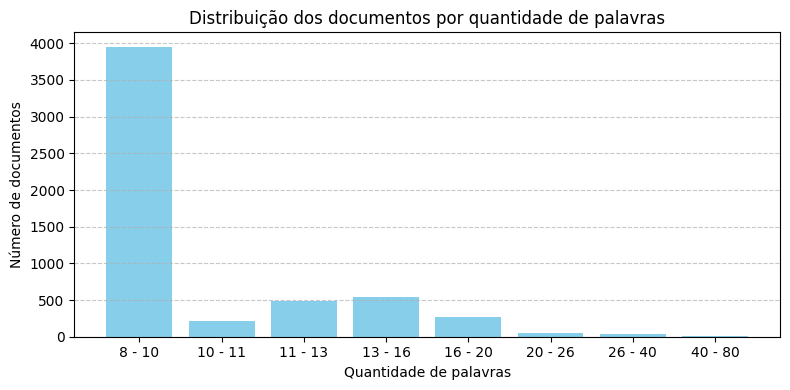

In [8]:
max_words = data_frame['Word_Count'].max()
num_bar = 8
count = np.zeros(num_bar)

for doc in data_frame['Word_Count']:
    for i in range(num_bar):
        if doc <= max_words/(num_bar-i):
            count[i]+=1
            break

labels = []
for i in range(num_bar):
    lower_bound = int(max_words / (num_bar - i + 1))  
    upper_bound = int(max_words / (num_bar - i))      
    labels.append(f"{lower_bound} - {upper_bound}")

plt.figure(figsize=(8, 4))
plt.bar(labels, count, color='skyblue')
plt.xlabel('Quantidade de palavras')
plt.ylabel('Número de documentos')
plt.title('Distribuição dos documentos por quantidade de palavras')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

X = data_frame['message'].apply(lambda tokens: ' '.join(tokens)).tolist() # Dados de entrada, matriz gerada pelo TfidfVectorizer
y = data_frame["label"] # Rótulos ham ou spam

label_enconder = LabelEncoder()
y_enconder = label_enconder.fit_transform(y) #transforma o label em número: 0->ham 1->spam

X_train, X_test, y_train, y_test = train_test_split(X,y_enconder,test_size=0.2,random_state=42) #80% da entrada foi usada para terinamento e 20% para teste, com um valor de aleatoriedade 42

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

vocab = vectorizer.get_feature_names_out().tolist()
print("Tamanho do vocabulario: ",len(vocab))



Tamanho do vocabulario:  6387


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 33876 stored elements and shape (4457, 6387)>

In [32]:
#KNN Algorithm

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def euclidean_distance(point1,point2):
    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance

def find_neighbors(X_train, query_point, k):
    distances=[]
    for i in range(X_train.shape[0]):
        distance = euclidean_distance(X_train[i].toarray(), query_point.toarray()) #calculando a distância euclediana de cada pont de X_train com query_point
        distances.append((i,distance))
    distances.sort(key=lambda x:x[1])
    neighbors = [index for index, _ in distances[:k]] # os k pontos mais próximos serão os vizinhos
    return neighbors
    
def predict(X_train, y_train, query_point, k):
    neighbors = find_neighbors(X_train, query_point,k) # encontra os k vizinhos
    neighbor_label = [y_train[i] for i in neighbors] # busca o label deles

    label_counts = {}
    for label in neighbor_label: # conta a ocorrência de cada label nos vizinhos
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    
    predicted_class = max(label_counts, key=label_counts.get)
    return predicted_class #retorna o label com maior ocorrência


#Fazendo as predições de X_test sobre os pontos de X_train
predictions = []
for i in range(X_test_tfidf.shape[0]):
    query_point = X_test_tfidf[i]
    pred = predict(X_train_tfidf, y_train, query_point, k=5)
    predictions.append(pred)

print("Acurácia:", accuracy_score(y_test, predictions))
print("f1:",f1_score(y_test,predictions, average='weighted'))

KeyboardInterrupt: 

In [26]:
#KNN com biblioteca

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Treinando o modelo SVM
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [5,10,15], #quantidade de k
               'metric': ['euclidean', 'manhattan']} #método de cálculo de distância
clf = GridSearchCV(knn,parameters,cv=5, scoring='accuracy')

clf.fit(X_train_tfidf, y_train)
best_knn = clf.best_estimator_

#Avaliando o modelo
pred_y = best_knn.predict(X_test_tfidf)
print("Melhores parâmetros:", clf.best_params_)
print("Acurácia:", accuracy_score(y_test, pred_y))
print("f1:",f1_score(y_test,pred_y, average='weighted'))

Melhores parâmetros: {'metric': 'euclidean', 'n_neighbors': 5}
Acurácia: 0.9237668161434978
f1: 0.9101622711927667


In [27]:
#SVM Algorithm

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

#Treinando o modelo SVM

#Decidindo os hiperparâmentros
svm_model = SVC()
parameters = {'kernel':['linear'], 
               'C':[1,10]} #tamanho da margem
clf = GridSearchCV(svm_model,parameters,cv=5, scoring='accuracy')

clf.fit(X_train_tfidf, y_train) #treina com todas as combinações
best_svm = clf.best_estimator_ #escolhe a combinação de parâmetros com melhor desempenho

#Avaliando o modelo
y_pred = best_svm.predict(X_test_tfidf) #Aplicando o modelo no resto das entradas com o modelo ja treinado
print("Melhores hiperparâmetros:", clf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
#O que é macro, micro e weighted?
print("f1:",f1_score(y_test,y_pred, average='weighted'))


Melhores hiperparâmetros: {'C': 10, 'kernel': 'linear'}
Accuracy: 0.9847533632286996
f1: 0.9846429506292045


Melhores hiperparâmetros: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9605381165919282
f1: 0.9846429506292045


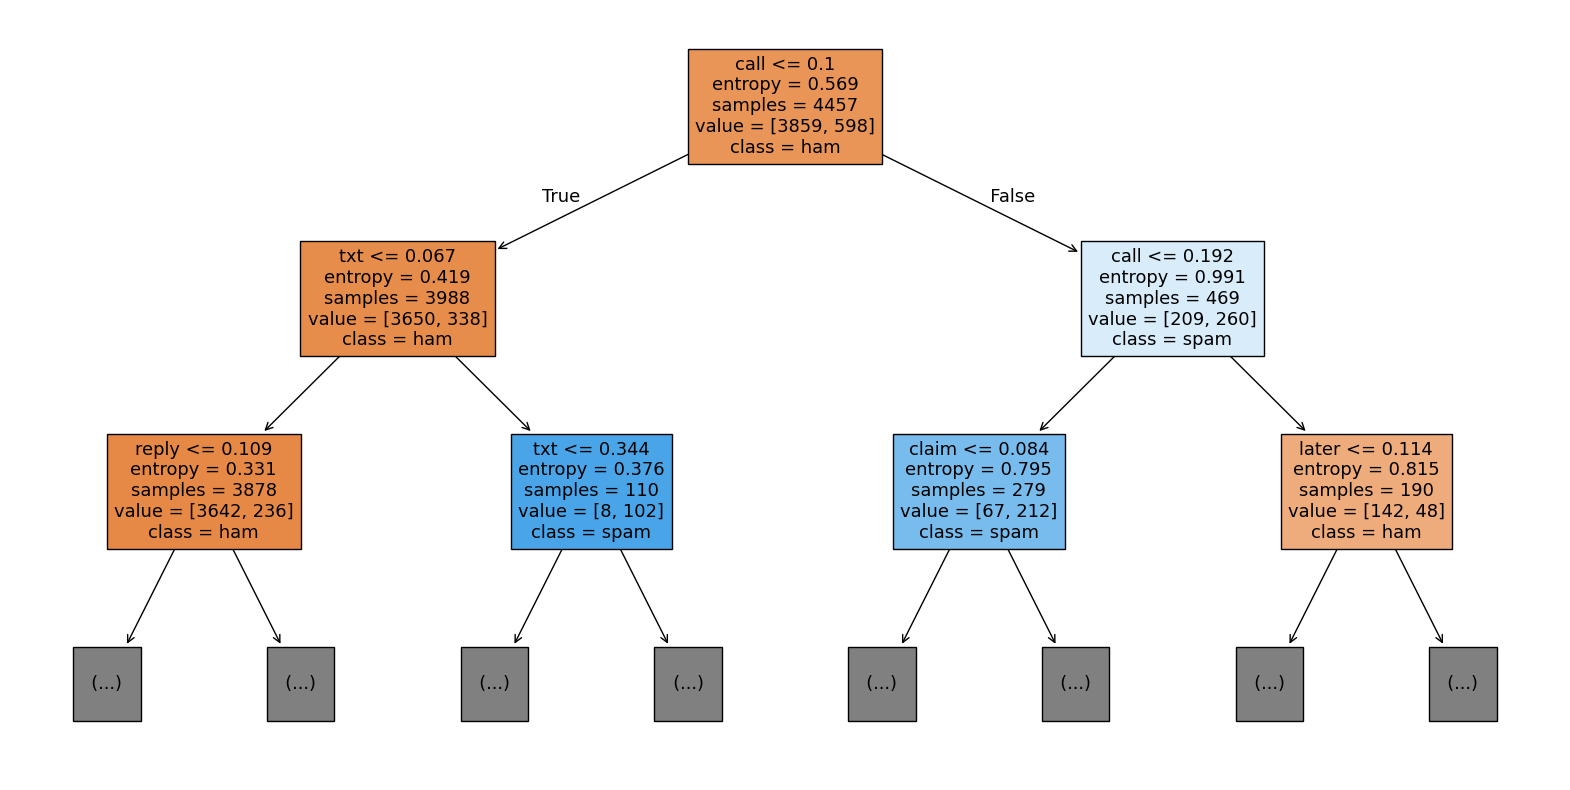

In [30]:
#Decision Trees

from sklearn import tree

#Treinando o modelo
tree_clf = tree.DecisionTreeClassifier(random_state=42)

#Decidindo os hiperparâmentros
parameters = { 
    'criterion': ['gini', 'entropy'], 
    'max_depth': [None, 5, 10, 20], #profundidade máx da árvore
    'min_samples_split': [2, 5, 10], #mínimo de amostras para dividir um nó interno
    'min_samples_leaf': [1, 2, 4] #mínimo de amostras por nó folha
}
clf = GridSearchCV(estimator = tree_clf, param_grid = parameters, cv = 5, scoring='accuracy')

clf.fit(X_train_tfidf,y_train) #treina com todas as combinações
best_tree = clf.best_estimator_ #escolhe o com melhor desempenho

#Avaliando o modelo
tree_pred = best_tree.predict(X_test_tfidf)
print("Melhores hiperparâmetros:", clf.best_params_)
print("Accuracy:", accuracy_score(y_test, tree_pred))
print("f1:",f1_score(y_test,y_pred, average='weighted'))

plt.figure(figsize=(20,10))
tree.plot_tree(best_tree, max_depth=2, feature_names=vectorizer.get_feature_names_out(), class_names=label_enconder.classes_, filled=True)
plt.show()
# max_depth profundidade da árvore
# filled=True colore os nós de acordo com a classe predominante
# feature_names mostra quais palavras sao mais importantes para as decisoes